## İlk Başta Gerekli Olacağını Düşündüğüm Kütüphaneleri Dahil ediyoruz (klasik veri kütüphanelerimiz)

In [94]:
import numpy as np  # Initially Included Libraries That We Think Will Be Necessary (our classic data libraries)
import pandas as pd 

## Veri setini dahil ediyoruz projemize eklediğim linkten indirebilirsiniz 

In [95]:
## We are including the dataset, you can download it from the link I added to project.
df= pd.read_excel("Mall Customers.xlsx") # https://www.kaggle.com/datasets/simtoor/mall-customers
df.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


## Sütunları türkçeleştirdim ( isterseniz yapmayabilirsiniz )

In [96]:
## I translated the columns into Turkish (you can leave it out if you want)
df.rename(columns={
    'CustomerID': 'MusteriID',
    'Gender': 'Cinsiyet',
    'Age': 'Yas',
    'Annual Income (k$)': 'YillikGelir (k$)',
    'Spending Score (1-100)': 'HarcamaSkoru (1-100)',
    'Education ' :"Egitim",
    'Marital Status':'MedeniHal'
},inplace=True)

## Veri seti üzerinde gerekli işlemleri (Manipülasyonları) bu alanda yapacağız
## We will perform the necessary operations (manipulations) on the data set in this area.

In [97]:
df.set_index("MusteriID",inplace=True)

In [98]:
df.head(2)

,Cinsiyet,Yas,Egitim,MedeniHal,YillikGelir (k$),HarcamaSkoru (1-100)
MusteriID,,,,,,
1,M,19,High School,Married,15,39
2,M,21,Graduate,Single,15,81


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cinsiyet              200 non-null    object
 1   Yas                   200 non-null    int64 
 2   Egitim                200 non-null    object
 3   MedeniHal             200 non-null    object
 4   YillikGelir (k$)      200 non-null    int64 
 5   HarcamaSkoru (1-100)  200 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 10.9+ KB


###  DataFrame içindeki her sütun için benzersiz değerleri ve eşsiz değer sayısını içeren bir özet döndürür. 
- :param df: pd.DataFrame - Analiz edilecek DataFrame
- :return: pd.DataFrame - Her sütunun eşsiz değer sayısını ve eşsiz değerleri içeren DataFrame

In [100]:
def analizeDataFrame(df):
    """
    Returns a summary containing the unique values ​​and the number of unique values ​​for each column in the DataFrame.

    :param df: pd.DataFrame - DataFrame to analyze
    :return: pd.DataFrame - DataFrame containing the unique values ​​and the number of unique values ​​for each column
    """
    summary = []

    for column in df.columns:
        unique_values = df[column].unique()  # Tüm benzersiz değerleri al
        num_unique = df[column].nunique()  # Benzersiz değerlerin sayısını al
        emptyNumber=df[column].isna().sum()
        valueCounts=df[column].value_counts()

        summary.append({

            
            "Column Name": column,
            "Num Unique": num_unique,
            "Unique Values": unique_values,
            "Empty Number" : emptyNumber,
            "Value Counts":valueCounts
        })
    
    return pd.DataFrame(summary)

In [101]:
analizeDataFrame(df)

,Column Name,Num Unique,Unique Values,Empty Number,Value Counts
0,Cinsiyet,2,"[M, F]",0,"Cinsiyet F 112 M 88 Name: count, dtype:..."
1,Yas,51,"[19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 2...",0,Yas 32 11 35 9 31 8 19 8 30 ...
2,Egitim,7,"[High School, Graduate, Uneducated, Unknown, C...",0,Egitim Graduate 67 High School 40...
3,MedeniHal,4,"[Married, Single, Unknown, Divorced]",0,MedeniHal Married 112 Single 61 Unkn...
4,YillikGelir (k$),64,"[15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28, 2...",0,YillikGelir (k$) 54 12 78 12 60 6...
5,HarcamaSkoru (1-100),84,"[39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 99, 15,...",0,HarcamaSkoru (1-100) 42 8 55 7 73 6 4...


### Unknown olarak girilen iki sütun olduğu için orada eksik değer girildiğini varsayarak yerlerini doldurma işlemi yapmadan önce verinin dağılımına bakıyoruz

In [102]:
"""
  Since there are two columns entered as Unknown, 
  we assume that there is a missing value entered there
  and look at the distribution of the data before filling in their places.
"""
print(df["Egitim"].value_counts())
print("******")
print(df["MedeniHal"].value_counts())

Egitim
Graduate         67
High School      40
Uneducated       31
Unknown          26
College          17
Doctorate        11
Post-Graduate     8
Name: count, dtype: int64
******
MedeniHal
Married     112
Single       61
Unknown      15
Divorced     12
Name: count, dtype: int64


### Knn yardımıyla buralardaki unknown değerlerinin en yakın komşularına bakarak buradaki unknown yani bilinmeyen hücreleri dolduruyoruz burada parametre olarak butun sütunları dahil ediyoruz lakin öncesinde unknown değerler içeren iki sütunumuzuda labelencoder ile ölçeleklendiriyoruz ve knn algroitmasına sokabilecek şekilde yapıyoruz

In [103]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# öncelikle Unknown olan yerleri nan çeviriyorum - (First of all, I translate the Unknown places)
df["MedeniHal"] = df["MedeniHal"].replace("Unknown", np.nan)
df["Egitim"] = df["Egitim"].replace("Unknown", np.nan)

# labelencoder ile encoding yapıyorum - (I am encoding with labelencoder)
le_medeni = LabelEncoder()
df["Medeni_Hal_encoded"] = le_medeni.fit_transform(df["MedeniHal"])

le_egitim = LabelEncoder()
df["Egitim_encoded"] = le_egitim.fit_transform(df["Egitim"])

# Nan içeren yerlerde ayrı bir encoding yapmışsa nan olarak atanmasını sağlıyorum
# If there is a separate encoding in places containing nan, I ensure that it is assigned as nan.
df.loc[df["MedeniHal"].isna(), "Medeni_Hal_encoded"] = np.nan
df.loc[df["Egitim"].isna(), "Egitim_encoded"] = np.nan


# kmeans kullanacağı parametreler - (parameters that kmeans will use)
ozellikler = ["Medeni_Hal_encoded", "Egitim_encoded", "Yas", "YillikGelir (k$)", "HarcamaSkoru (1-100)"]

imputer = KNNImputer(n_neighbors=5)
df[ozellikler] = imputer.fit_transform(df[ozellikler])

# tekrardan sonkez known değiştiği için geri atamaları yapıyorum ve ekrana gerekli bilgilerin çıktısını yazdırıyorum
# since the last known has changed, I make the backward assignments and print the necessary information on the screen
df["MedeniHal"] = le_medeni.inverse_transform(df["Medeni_Hal_encoded"].astype(int))
df["Egitim"] = le_egitim.inverse_transform(df["Egitim_encoded"].astype(int))

print("KNN sonrası eksik 'Medeni Hal' sayısı:", df["MedeniHal"].isna().sum())
print("KNN sonrası eksik 'Egitim' sayısı:", df["Egitim"].isna().sum())

print("Medeni Hal Kategorileri:", df["MedeniHal"].unique())
print("Egitim Kategorileri:", df["Egitim"].unique())  

KNN sonrası eksik 'Medeni Hal' sayısı: 0
KNN sonrası eksik 'Egitim' sayısı: 0
Medeni Hal Kategorileri: ['Married' 'Single' 'Divorced']
Egitim Kategorileri: ['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']


In [104]:
print(df["Egitim"].value_counts())
print("******")
print(df["MedeniHal"].value_counts())

Egitim
Graduate         80
High School      47
Uneducated       31
College          17
Doctorate        16
Post-Graduate     9
Name: count, dtype: int64
******
MedeniHal
Married     127
Single       61
Divorced     12
Name: count, dtype: int64


In [105]:
"Unknown" in df.values # son kez unknown değer var mı diye bakıyorum (I check for unknown values ​​one last time.) 

False

### Kategorik değerleri numeric şekilde dönürüyorum 
### I return categorical values ​​numerically

In [106]:
import pandas as pd

education_order = {
    "Uneducated": 0,
    "High School": 1,
    "College": 2,
    "Graduate": 3,
    "Post-Graduate": 4,
    "Doctorate": 5
}


df["Egitim_Encoded"] = df["Egitim"].map(education_order)


print(df.head(2))


#  One-Hot Encoding: Cinsiyet, Medeni Hal ve Egitim için - (One-Hot Encoding: For Gender, Marital Status and Education)
df = pd.get_dummies(df, columns=["Cinsiyet", "MedeniHal"], drop_first=True)

          Cinsiyet   Yas       Egitim MedeniHal  YillikGelir (k$)  \
MusteriID                                                           
1                M  19.0  High School   Married              15.0   
2                M  21.0     Graduate    Single              15.0   

           HarcamaSkoru (1-100)  Medeni_Hal_encoded  Egitim_encoded  \
MusteriID                                                             
1                          39.0                 1.0             3.0   
2                          81.0                 2.0             2.0   

           Egitim_Encoded  
MusteriID                  
1                       1  
2                       3  


In [107]:
df.head(2)

,Yas,Egitim,YillikGelir (k$),HarcamaSkoru (1-100),Medeni_Hal_encoded,Egitim_encoded,Egitim_Encoded,Cinsiyet_M,MedeniHal_Married,MedeniHal_Single
MusteriID,,,,,,,,,,
1,19.0,High School,15.0,39.0,1.0,3.0,1,True,True,False
2,21.0,Graduate,15.0,81.0,2.0,2.0,3,True,False,True


In [108]:
# gereksiz sütunları düşürüyorum - (dropping unnecessary columns)
df.drop(columns=["Medeni_Hal_encoded","Egitim_encoded"],inplace=True)

## Kmean uygulayıp müşteri segmentasyonunu yapıyorum 
## I apply kmean and perform customer segmentation

Küme Merkezleri:
 [[ 0.05900163 -0.0858249  -0.02112911 -0.05949327  0.03830962 -1.31898674
   1.50953255]
 [-0.76210704 -0.49115247  0.8492963  -0.2854993   0.45663301  0.70489762
  -0.66245673]
 [ 0.06683273 -0.57006042 -0.51608412  0.98881534 -0.76049542  0.69324697
  -0.66245673]
 [-0.37677512  1.14279271  0.51503271  0.07896789 -0.75210143  0.34272884
  -0.66245673]
 [ 0.92862319  0.2196952  -0.80973603 -0.50651487  0.7040348   0.53951095
  -0.66245673]]

Her Kümede Kaç Müşteri Var:
 Cluster
0    61
1    39
4    38
2    32
3    30
Name: count, dtype: int64


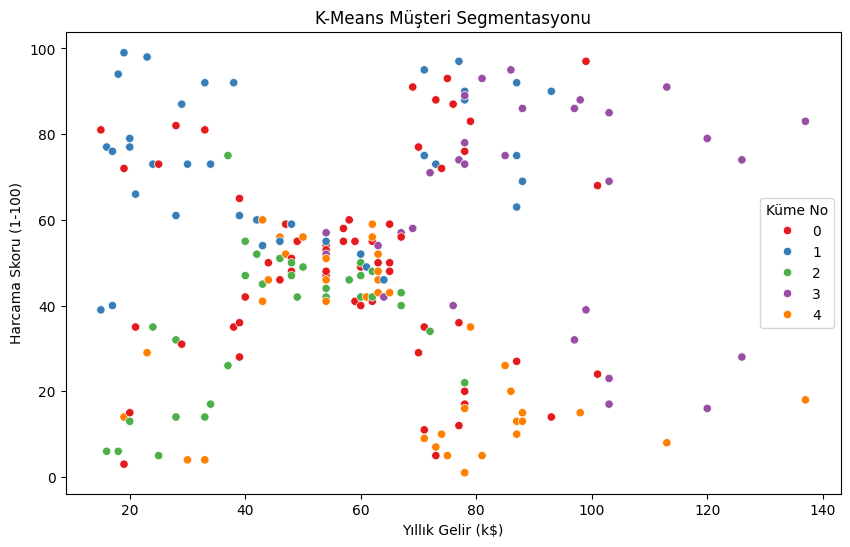

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


ozellikler = ["Yas", "YillikGelir (k$)", "HarcamaSkoru (1-100)", "Egitim_Encoded", "Cinsiyet_M", "MedeniHal_Married", "MedeniHal_Single"]


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[ozellikler])


kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)


print("Küme Merkezleri:\n", kmeans.cluster_centers_)
print("\nHer Kümede Kaç Müşteri Var:\n", df["Cluster"].value_counts())

# görselleştirme işlemi 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["YillikGelir (k$)"], y=df["HarcamaSkoru (1-100)"], hue=df["Cluster"], palette="Set1")
plt.title("K-Means Müşteri Segmentasyonu")
plt.xlabel("Yıllık Gelir (k$)")
plt.ylabel("Harcama Skoru (1-100)")
plt.legend(title="Küme No")
plt.show()


In [110]:
df=df.reset_index() 
df.head(2)

,MusteriID,Yas,Egitim,YillikGelir (k$),HarcamaSkoru (1-100),Egitim_Encoded,Cinsiyet_M,MedeniHal_Married,MedeniHal_Single,Cluster
0,1,19.0,High School,15.0,39.0,1,True,True,False,1
1,2,21.0,Graduate,15.0,81.0,3,True,False,True,0


## Örnek senaryoda segmentasyona uğramış müşteriler üzerinden tavsiye verilmesi 
## Sample scenario giving advice based on segmented customers

In [111]:
import random

# Mevcut müşteri sayısını öğrenelim
toplam_musteri = df["MusteriID"].nunique()

# Olası ürünleri tanımlayalım
tum_urunler = ["Laptop", "Telefon", "Tablet", "Akıllı Saat", "Kulaklık", "Kahve Makinesi" ]

# Her müşteri için 1-3 arası rastgele ürün seçelim
alisveris_veriseti = pd.DataFrame({
    "MusteriID": df["MusteriID"],
    "Aldiği_Urunler": [random.sample(tum_urunler, random.randint(1, 3)) for _ in range(toplam_musteri)]
})

# Müşteri bilgilerini ve alışveriş verisini birleştir
alisveris_veriseti = alisveris_veriseti.merge(df[["MusteriID", "Cluster"]], on="MusteriID")

# Sonuçları göster
alisveris_veriseti.head(4)  # İlk 4 müşterinin alışveriş verisini göster


,MusteriID,Aldiği_Urunler,Cluster
0,1,[Laptop],1
1,2,"[Tablet, Akıllı Saat, Laptop]",0
2,3,"[Laptop, Telefon]",2
3,4,"[Akıllı Saat, Tablet]",1


In [112]:
alisveris_veriseti[alisveris_veriseti["Cluster"]==3]

,MusteriID,Aldiği_Urunler,Cluster
78,79,"[Telefon, Kulaklık]",3
84,85,"[Tablet, Kulaklık, Laptop]",3
111,112,"[Akıllı Saat, Laptop]",3
112,113,"[Laptop, Tablet]",3
119,120,"[Kulaklık, Kahve Makinesi]",3
122,123,"[Akıllı Saat, Kahve Makinesi, Laptop]",3
133,134,"[Laptop, Kulaklık]",3
142,143,"[Kahve Makinesi, Telefon]",3
147,148,"[Kulaklık, Akıllı Saat]",3
155,156,[Tablet],3


### Öneri fonksiyonuyla ekrana önerilecek ürünleri yazdırıyorum 
### I print the products to be suggested on the screen with the suggestion function

In [113]:
def öneri_yap(musteri_id, alisveris_veriseti):
  
    musteri_kümesi = alisveris_veriseti.loc[alisveris_veriseti["MusteriID"] == musteri_id, "Cluster"].values[0]
    
   
    ayni_küme_musterileri = alisveris_veriseti[alisveris_veriseti["Cluster"] == musteri_kümesi]
    

    musterinin_aldigi_urunler = set(alisveris_veriseti.loc[alisveris_veriseti["MusteriID"] == musteri_id, "Aldiği_Urunler"].values[0])
    

    küme_urunleri = set(sum(ayni_küme_musterileri["Aldiği_Urunler"].tolist(), []))
    

    öneriler = küme_urunleri - musterinin_aldigi_urunler
    
    return list(öneriler)


musteri_id = 79
önerilen_urunler = öneri_yap(musteri_id, alisveris_veriseti)

print(f"Müşteri {musteri_id} için önerilen ürünler:", önerilen_urunler)

Müşteri 79 için önerilen ürünler: ['Akıllı Saat', 'Tablet', 'Laptop', 'Kahve Makinesi']
